In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset
License(s): CC0-1.0
 85%|██████████████████████████████████▉      | 126M/148M [00:00<00:00, 216MB/s]
100%|█████████████████████████████████████████| 148M/148M [00:00<00:00, 203MB/s]


In [3]:
import zipfile

# Path to the downloaded zip file
local_zip = '/kaggle/working/cotton-disease-dataset.zip'

# Directory where the dataset will be extracted
extract_dir = '/kaggle/working/'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to {extract_dir}")

Dataset extracted to /kaggle/working/


In [4]:
train_path='/kaggle/working/Cotton Disease/train'
val_path='/kaggle/working/Cotton Disease/test'


In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

2024-07-25 18:08:46.115283: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 18:08:46.115399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 18:08:46.244850: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
datagen= ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)

train_generator=datagen.flow_from_directory(
    '/kaggle/working/Cotton Disease/train',
    target_size=(242,242),
    batch_size=32,
    class_mode='categorical',
    subset='training'
    
)


test_generator=datagen.flow_from_directory(
    '/kaggle/working/Cotton Disease/test',
    target_size=(242,242),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1562 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [7]:
inception = InceptionV3(input_shape=(242,242,3), weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('/kaggle/working/Cotton Disease/train')

In [10]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [11]:

num_classes = 4
prediction = Dense(num_classes, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 242, 242,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 120, 120,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 120, 120,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 120, 120,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 118, 118,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 118, 118,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 118, 118,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 118, 118,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 118, 118,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 118, 118,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 58, 58,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 58, 58,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 58, 58,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 58, 58,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 56, 56,    │          0 │ batch_normalizat

 Total params: 22,097,700 (84.30 MB)

 Trainable params: 294,916 (1.13 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=20
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/48 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.3359 - loss: 7.6782  

I0000 00:00:1721930978.323489     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


48/48 ━━━━━━━━━━━━━━━━━━━━ 45s 548ms/step - accuracy: 0.5539 - loss: 7.9507 - val_accuracy: 1.0000 - val_loss: 5.2835e-04
Epoch 2/20
 1/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8750 - loss: 1.0552

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8750 - loss: 1.0552 - val_accuracy: 1.0000 - val_loss: 2.1803e-04
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9595 - loss: 0.3100 - val_accuracy: 0.9500 - val_loss: 0.3437
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8438 - loss: 1.1756 - val_accuracy: 0.9500 - val_loss: 0.2326
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9771 - loss: 0.1249 - val_accuracy: 1.0000 - val_loss: 1.2444e-05
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.7171e-04 - val_accuracy: 1.0000 - val_loss: 1.4279e-05
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9899 - loss: 0.0400 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.8993e-04 - val_accuracy: 1.0000 - val_loss: 0.0217
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9901 - loss: 0.0290 - val_accuracy: 1.000

In [17]:

loss, accuracy = model.evaluate(test_generator)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 1.0000 - loss: 2.6285e-06
Test Loss: 2.628511765578878e-06
Test Accuracy: 1.0


In [18]:

import matplotlib.pyplot as plt

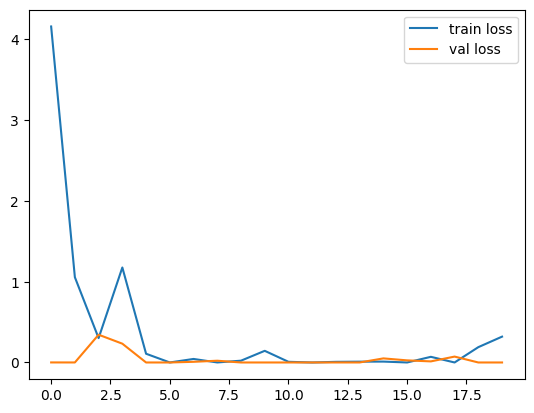

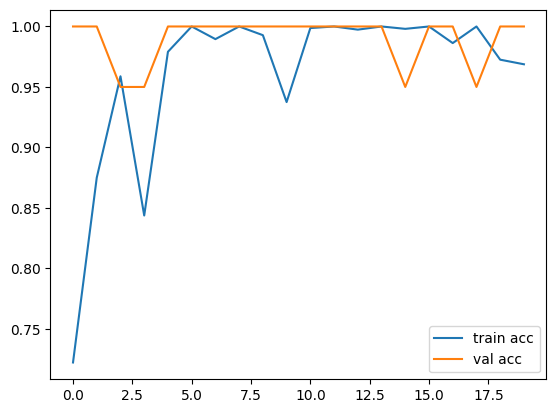

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inceptionV3.h5')

In [27]:

y_pred = model.predict(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


In [28]:
import numpy as np

np.argmax(y_pred, axis=1)

array([0, 3, 3, 1, 0, 2, 2, 2, 2, 3, 1, 2, 0, 1, 3, 1, 3, 0, 1, 0])

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


model=load_model('model_inceptionV3.h5')

In [32]:
img=image.load_img('/kaggle/input/disease-image/1116130.jpg',target_size=(242,242))

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
0
Predicted class: fresh cotton leaf


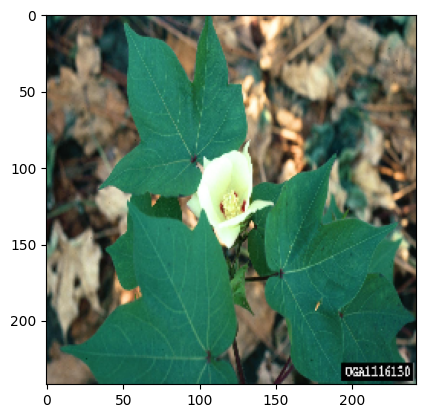

In [33]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(242, 242))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale the image array
    return img_array


def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])  # Get the index of the highest probability
    return predicted_class_index

predictions = []

class_labels = {2:"diseased cotton leaf",3:"diseased cotton plant",0:"fresh cotton leaf",1:"fresh cotton plant"}


img_path = '/kaggle/input/disease-image/1116130.jpg'  # Path to the image you want to predict
predicted_class_index = predict_image(img_path)

print(predicted_class_index)
predicted_class_label = class_labels[predicted_class_index]

plt.imshow(img)
print(f'Predicted class: {predicted_class_label}')